In [ ]:

import os
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd


In [ ]:
from google.colab import files
uploded = files.upload()

Saving spam_ham_dataset.csv to spam_ham_dataset.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploded['spam_ham_dataset.csv']))

NameError: ignored

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()
print('Total %s data email'% len(df))

Total 5171 data email


In [ ]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


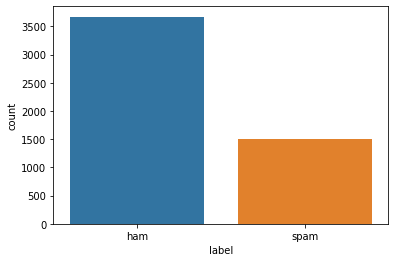

In [ ]:
df_label = sns.countplot(df['label'])
df_label.set_xticklabels(df['label'].unique())
plt.show()

In [ ]:
#data preprocessing
#data text cleaning
# punchuations
punct = []
for char in string.punctuation:
    punct.append(char)

In [ ]:
 def cleaning(txt):
    # case folding
    text = txt.lower()
 # remove multiple space, tabs, dan newlines
    text = re.sub('\s+',' ',text)    
    # remove links
    text = text.replace("http://", " ").replace("https://", " ")    
    # remove special characters
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())    
    # remove punctuation
    text = ''.join([word for word in text if word not in punct])    
    #remove single character
    text = re.sub(r"\b[a-zA-Z]\b", "", text)    
    #remove numbers
    text = re.sub(r"\d+", "", text)    
    #remove multiple spaces (again)
    text = re.sub('\s+',' ',text)    
    return text

In [ ]:
# call function for cleaning
    # apply fungsi cleaning ke setiap text
df['text_cleaned'] = df['text'].apply(lambda x: cleaning(x))
df = df[['text', 'text_cleaned', 'label']]
df.head()


,text,text_cleaned,label
0,Subject: enron methanol ; meter # : 988291\r\n...,subject enron methanol meter this is follow up...,ham
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",subject hpl nom for january see attached file ...,ham
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",subject neon retreat ho ho ho we re around to ...,ham
3,"Subject: photoshop , windows , office . cheap ...",subject photoshop windows office cheap main tr...,spam
4,Subject: re : indian springs\r\nthis deal is t...,subject re indian springs this deal is to book...,ham


In [ ]:

#compare
print(df['text'][0])
print(df['text_cleaned'][0])


Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .
subject enron methanol meter this is follow up to the note gave you on monday preliminary flow data provided by daren please override pop daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes 


In [ ]:
# to remove stop words
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#lammitaization
from nltk.stem import PorterStemmer, WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN) 


In [ ]:

def do_lemma(string):
    lemmatized = ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in nltk.word_tokenize(string)])
    return lemmatized
    df['text_cleaned'] = df['text_cleaned'].apply(lambda x: do_lemma(x))

In [ ]:

df = df.drop(['text'], axis=1)
df = df.rename(columns = {'text_cleaned' : 'text'})
df.columns

Index(['text', 'label'], dtype='object')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:

from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# defining the classifier
clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')


In [ ]:
#predicting the time of train and testing
t0 = time()
clf.fit(X_train, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")



Training time: 0.01 s



In [ ]:
#predicting the time of  testing
t1 = time()
pred = clf.predict(X_test)
print("Predicting time:", round(time()-t1, 3), "s\n")


Predicting time: 0.356 s



In [ ]:

#calculating and printing the accuracy of the algorithm
print("Accuracy of KNN Algorithm: ", accuracy_score(pred,y_test))
# tested ok 09/10/2022

Accuracy of KNN Algorithm:  0.961352657004831
